# Proyek Analisis Data: Bike Sharing Dataset
- Nama: An Naffila Putri Prasari
- Email: putriannaffila@gmail.com
- Id Dicoding: annaffilaputri

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca, musim, atau hari kerja berpengaruh terhadap jumlah peminjaman sepeda?
- Kapan waktu peminjaman sepeda paling tinggi dan paling rendah?
- Berapa perbandingan antara jumlah pengguna biasa dengan pengguna terdaftar?
- Bagaimana histori peminjaman sepeda pada rentang tahun 2011-2012?

## Menyiapkan semua library yang dibutuhkan

In [1]:
# Memanggil library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
path_day = "/content/day.csv"

day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
path_hour = "/content/hour.csv"

hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel *day_df*

In [4]:
# Memeriksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data untuk kolom *dteday*. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.



In [5]:
# Memeriksa missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value pada dataset day_df.

In [6]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# Melihat ringkasan parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ditemukan keanehan pada ringkasan parameter statistik dataset day_df.

#### Menilai tabel *hour_df*

In [8]:
# Memeriksa tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom *dteday*. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.


In [9]:
# Memeriksa missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value pada dataset hour_df.

In [10]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# Melihat ringkasan parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ditemukan keanehan pada ringkasan parameter statistik dataset hour_df.

Tabel Ringkasan untuk Assessing Data
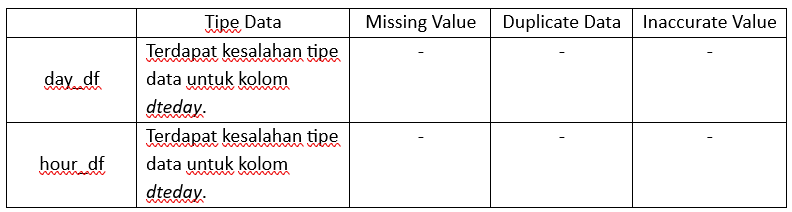

### Cleaning Data

#### Membersihkan Data day_df

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom *dteday*.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom *dteday* menjadi datetime.

In [12]:
# Mengganti tipe data kolom dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Meskipun pada kolom *season, yr, mnth, holiday, weekday, workingday, dan weathersit* tidak ditemukan kesalahan tipe data, tetapi kita dapat merapikan kolom-kolom tersebut agar lebih mudah dalam melakukan analisis nantinya dan mudah dalam memahaminya.

In [13]:
# Merapikan kolom season
day_df["season"] = day_df.season.apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

# Merapikan kolom yr
day_df["yr"] = day_df.yr.apply(lambda x: 2011 if x == 0 else 2012)

# Merapikan kolom mnth
day_df["mnth"] = day_df["mnth"].astype(int)
day_df["mnth"] = day_df.mnth.apply(lambda x: calendar.month_name[x])

# Merapikan kolom holiday
day_df["holiday"] = day_df.holiday.apply(lambda x: "No" if x == 0 else "Yes")

# Merapikan kolom weekday
day_df["weekday"] = day_df.weekday.apply(lambda x: "Sunday" if x == 0 else ("Monday" if x == 1 else ("Tuesday" if x == 2 else ("Wednesday" if x == 3 else ("Thursday" if x == 4 else ("Friday" if x == 5 else "Saturday"))))))

# Merapikan kolom workingday
day_df["workingday"] = day_df.workingday.apply(lambda x: "No" if x == 0 else "Yes")

# Merapikan kolom weathersit
day_df["weathersit"] = day_df.weathersit.apply(lambda x: "Clear, Few clouds, Partly cloudy" if x == 1 else ("Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" if x == 2 else ("Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" if x == 3 else "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")))

#### Membersihkan Data hour_df

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom *dteday*.

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom *dteday* menjadi datetime.

In [14]:
# Mengganti tipe data kolom dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Meskipun pada kolom *season, yr, mnth, holiday, weekday, workingday, dan weathersit* tidak ditemukan kesalahan tipe data, tetapi kita dapat merapikan kolom-kolom tersebut agar lebih mudah dalam melakukan analisis nantinya dan mudah dalam memahaminya.

In [15]:
# Merapikan kolom season
hour_df["season"] = hour_df.season.apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

# Merapikan kolom yr
hour_df["yr"] = hour_df.yr.apply(lambda x: 2011 if x == 0 else 2012)

# Merapikan kolom mnth
hour_df["mnth"] = hour_df["mnth"].astype(int)
hour_df["mnth"] = hour_df.mnth.apply(lambda x: calendar.month_name[x])

# Merapikan kolom holiday
hour_df["holiday"] = hour_df.holiday.apply(lambda x: "No" if x == 0 else "Yes")

# Merapikan kolom weekday
hour_df["weekday"] = hour_df.weekday.apply(lambda x: "Sunday" if x == 0 else ("Monday" if x == 1 else ("Tuesday" if x == 2 else ("Wednesday" if x == 3 else ("Thursday" if x == 4 else ("Friday" if x == 5 else "Saturday"))))))

# Merapikan kolom workingday
hour_df["workingday"] = hour_df.workingday.apply(lambda x: "No" if x == 0 else "Yes")

# Merapikan kolom weathersit
hour_df["weathersit"] = hour_df.weathersit.apply(lambda x: "Clear, Few clouds, Partly cloudy" if x == 1 else ("Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" if x == 2 else ("Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" if x == 3 else "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")))

#### Ekspor Dataset

In [16]:
day_df.to_csv("day_cleaned.csv", index=False)
hour_df.to_csv("hour_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

### Eksplorasi Data *day_df*

In [17]:
# Melihat jumlah rental sepeda berdasarkan season dan membership
day_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


Berdasarkan pivot table di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat musim gugur (fall). Di samping itu, masih banyak di antara penyewa sepeda belum terdaftar sebagai member.

In [18]:
# Melihat jumlah rental sepeda berdasarkan cuaca dan kondisi lingkungan
day_df.groupby(by="weathersit").agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "cnt": "sum",
})

,temp,atemp,hum,windspeed,cnt
weathersit,,,,,
"Clear, Few clouds, Partly cloudy",0.511541,0.488596,0.565594,0.190253,2257952
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",0.433440,0.413064,0.848872,0.243336,37869
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",0.470366,0.452868,0.725887,0.186431,996858


Berdasarkan pivot table di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat kondisi cuaca cerah, sedikit awan, berawan sebagian (Clear, Few clouds, Partly cloudy) dengan rata-rata suhu 16.04$^\circ$C (nilai normalisasi 0.511541), suhu yang dirasakan 16.23$^\circ$C (nilai normalisasi 0.488596), tingkat kelembapan 56.56% (nilai normalisasi 0.565594), dan kecepatan angin 12.75 km/jam (nilai normalisasi 0.190253).

In [19]:
# Melihat jumlah rental sepeda saat hari kerja
day_df.groupby(by="workingday").agg({
    "cnt": "sum",
})

,cnt
workingday,
No,1000269
Yes,2292410


Berdasarkan pivot table di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat hari kerja yakni mencapai 2.3 kali lipat lebih banyak dibandingkan saat hari libur.

In [20]:
# Melihat jumlah rental sepeda berdasarkan hari
bike_rent_by_day = day_df.groupby(by="weekday").agg({
    "cnt": "sum",
})
bike_rent_by_day.sort_values(by = "cnt", ascending = False)

,cnt
weekday,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


Berdasarkan pivot table di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat hari Jumat yakni mencapai 487790 total peminjaman.

In [21]:
# Melihat histori jumlah rental sepeda setiap bulan
bike_rent_history = day_df.groupby(by=["yr", "mnth"]).agg({
    "cnt": "sum",
})

# Mengurutkan bulan pada histori rental sepeda
bike_rent_history['month_num'] = bike_rent_history.index.get_level_values('mnth').map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})
bike_rent_history = bike_rent_history.sort_values(by=['yr', 'month_num'])
bike_rent_history = bike_rent_history.drop('month_num', axis=1)
bike_rent_history

cnt
yr   mnth             
2011 January     38189
     February    48215
     March       64045
     April       94870
     May        135821
     June       143512
     July       141341
     August     136691
     September  127418
     October    123511
     November   102167
     December    87323
2012 January     96744
     February   103137
     March      164875
     April      174224
     May        195865
     June       202830
     July       203607
     August     214503
     September  218573
     October    198841
     November   152664
     December   123713

Berdasarkan pivot table di atas, dapat diketahui bahwa total peminjaman sepeda mengalami fluktuasi. Pada tahun 2011, peminjaman sepeda mengalami kenaikan dari awal tahun hingga tengah tahun, kemudian menurun hingga akhir tahun. Sedangkan pada tahun 2012, kenaikan terjadi dari awal tahun hingga kuartal ketiga, kemudian mulai menurun pada kuartal keempat. <br>
Pada tahun 2011, total peminjaman sepeda tertinggi terjadi pada bulan Juni yaitu sebanyak 143512 peminjaman. <br>
Pada tahun 2012, total peminjaman sepeda tertinggi terjadi pada bulan September yaitu sebanyak 218573 peminjaman.



### Eksplorasi Data *hour_df*

In [22]:
# Melihat jumlah rental sepeda berdasarkan waktu
hour_df.groupby(by="hr").agg({
    "cnt": "sum",
})

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Berdasarkan pivot table di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada pukul 5 sore (17.00) yaitu mencapai 336860 peminjam dan paling sedikit pada pukul 4 pagi (04.00) yaitu sebanyak 4428 peminjam.

## Visualization & Explanatory Analysis

### <b>Pertanyaan 1:</b> Bagaimana cuaca, musim, atau hari kerja berpengaruh terhadap jumlah peminjaman sepeda?

#### Berdasarkan Musim

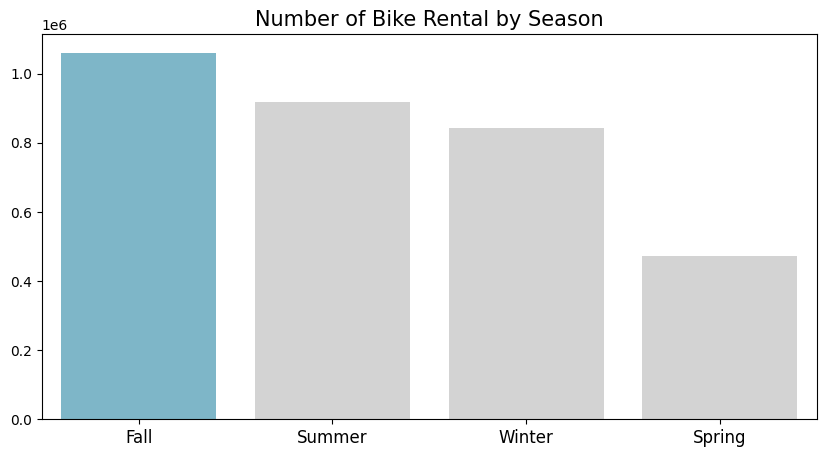

In [23]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan musim
byseason_df = day_df.groupby(by="season").cnt.sum()
byseason_df = byseason_df.to_frame().reset_index()
byseason_df

# Visualisasi dalam bar plot
plt.figure(figsize=(10, 5))
sns.barplot(
    y = "cnt",
    x = "season",
    data = byseason_df.sort_values(by="cnt", ascending=False),
    palette = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
)
plt.title("Number of Bike Rental by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat musim gugur (*fall*). Sebaliknya, pengguna jasa rental sepeda lebih sedikit melakukan peminjaman pada saat musim semi (*spring*).

#### Berdasarkan Cuaca

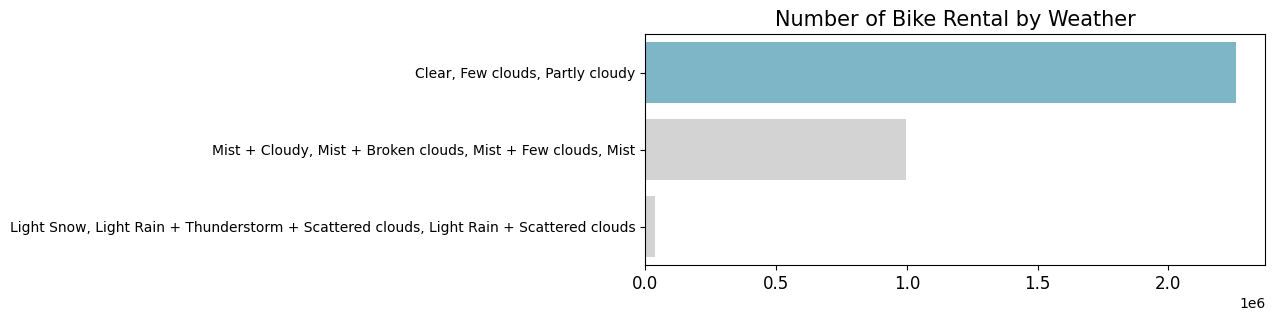

In [24]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan cuaca
byweather_df = day_df.groupby(by="weathersit").cnt.sum()
byweather_df = byweather_df.to_frame().reset_index()
byweather_df

# Visualisasi dalam bar plot
plt.figure(figsize=(8, 3))
sns.barplot(
    y = "weathersit",
    x = "cnt",
    data = byweather_df.sort_values(by="cnt", ascending=False),
    palette = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
)
plt.title("Number of Bike Rental by Weather", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat kondisi cuaca cerah, sedikit awan, berawan sebagian (*Clear, Few clouds, Partly cloudy*). Sebaliknya, pada saat salju ringan, hujan ringan disertai badai petir dan awan berserakan, hujan ringan disertai awan berserakan, sedikit pengguna jasa rental sepeda yang melakukan peminjaman.

#### Berdasarkan Hari Kerja

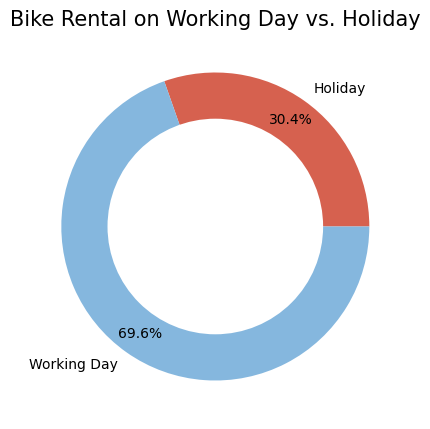

In [25]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan hari kerja
byworkingday_df = day_df.groupby(by="workingday").cnt.sum()
byworkingday_df

# Visualisasi dalam donut chart
plt.figure(figsize=(10, 5))
plt.pie(byworkingday_df, colors=["#d6614f", "#85b7de"], labels=["Holiday", "Working Day"],
        autopct='%1.1f%%', pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Bike Rental on Working Day vs. Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat hari kerja.

### <b>Pertanyaan 2:</b> Kapan waktu peminjaman sepeda paling tinggi dan paling rendah?

#### Berdasarkan Hari

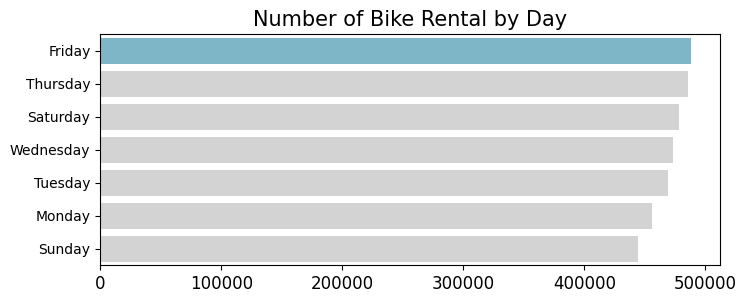

In [26]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan hari
byday_df = day_df.groupby(by="weekday").cnt.sum()
byday_df = byday_df.to_frame().reset_index()
byday_df

# Visualisasi dalam bar plot
plt.figure(figsize=(8, 3))
sns.barplot(
    y = "weekday",
    x = "cnt",
    data = byday_df.sort_values(by="cnt", ascending=False),
    palette = ["#72BCD4", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3"]
)
plt.title("Number of Bike Rental by Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat hari Jumat. Meskipun demikian, jumlah pengguna jasa rental sepeda di hari yang lain tidak jauh berbeda.

#### Berdasarkan Jam

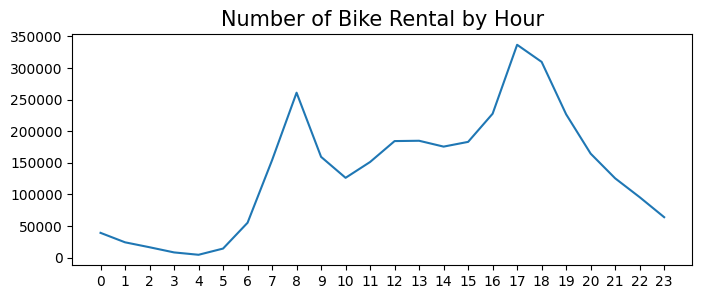

In [27]:
# Mengidentifikasi jumlah peminjaman sepeda berdasarkan jam
byhour_df = hour_df.groupby(by="hr").cnt.sum()
byhour_df = byhour_df.to_frame().reset_index()
byhour_df

# Visualisasi dalam bar plot
plt.figure(figsize=(8, 3))
sns.lineplot(
    y = "cnt",
    x = "hr",
    data = byhour_df,
)
plt.title("Number of Bike Rental by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(np.arange(min(byhour_df.hr), max(byhour_df.hr)+1, 1.0))
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa pengguna jasa rental sepeda paling banyak melakukan peminjaman pada pukul 5 sore (17.00) dan paling sedikit pada pukul 4 pagi (04.00).

### <b>Pertanyaan 3:</b> Berapa perbandingan antara jumlah pengguna biasa dengan pengguna terdaftar?

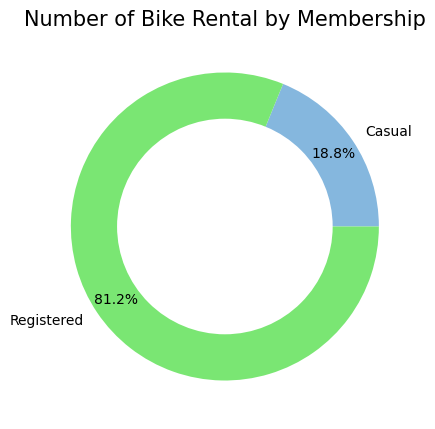

In [28]:
# Mengidentifikasi jumlah peminjam sepeda berdasarkan status membership
non_member = pd.Series(day_df["casual"].sum())
member = pd.Series(day_df["registered"].sum())
bymembership_df = pd.concat([non_member, member])
bymembership_df

# Visualisasi dalam donut chart
plt.figure(figsize=(10, 5))
plt.pie(bymembership_df, colors=["#85b7de", "#7ae673"], labels=["Casual", "Registered"],
        autopct='%1.1f%%', pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Number of Bike Rental by Membership", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa sebagian besar pengguna jasa rental sepeda telah terdaftar sebagai member. Perbandingan antara jumlah pengguna biasa dengan pengguna terdaftar sekitar 1:4.

### <b>Pertanyaan 4:</b> Bagaimana histori peminjaman sepeda pada rentang tahun 2011-2012?

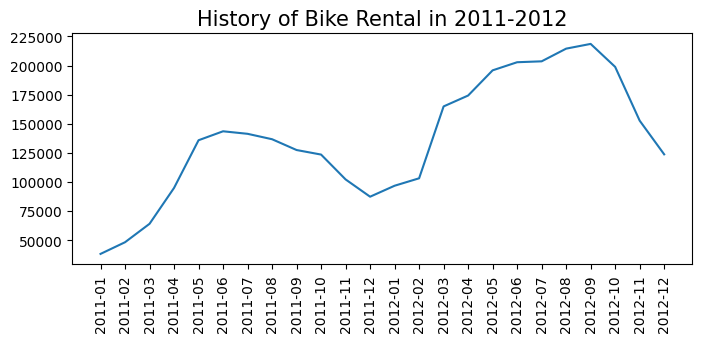

In [29]:
# Mengidentifikasi jumlah peminjaman sepeda dalam rentang tahun 2011-2012
#bike_rent_history = bike_rent_history.Series.reset_index()
day_df['Month_Year'] = day_df['dteday'].dt.to_period('M')
rent_history = day_df.groupby(by="Month_Year").cnt.sum()
rent_history = rent_history.to_frame().reset_index()
rent_history


# Visualisasi dalam line chart
plt.figure(figsize=(8, 3))
sns.lineplot(
    y = rent_history["cnt"],
    x = rent_history["Month_Year"].astype(str),
)
plt.title("History of Bike Rental in 2011-2012", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=90)
plt.show()

Berdasarkan gambar di atas, dapat diketahui bahwa total peminjaman sepeda mengalami fluktuasi. Pada tahun 2011, peminjaman sepeda mengalami kenaikan dari awal tahun hingga tengah tahun, kemudian menurun hingga akhir tahun. Sedangkan pada tahun 2012, kenaikan terjadi dari awal tahun hingga kuartal ketiga, kemudian mulai menurun pada kuartal keempat. <br>
Sepanjang tahun 2011-2012, total peminjaman sepeda tertinggi terjadi pada bulan September 2012 sedangkan peminjaman sepeda terendah terjadi pada bulan Januari 2011.


## Conclusion

- Cuaca, musim, atau hari kerja berpengaruh terhadap jumlah peminjaman sepeda.
> 1. Pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat musim gugur (*fall*). Sebaliknya, pengguna jasa rental sepeda lebih sedikit melakukan peminjaman pada saat musim semi (*spring*). <br>
> 2. Pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat kondisi cuaca cerah, sedikit awan, berawan sebagian (*Clear, Few clouds, Partly cloudy*). Sebaliknya, pada saat salju ringan, hujan ringan disertai badai petir dan awan berserakan, hujan ringan disertai awan berserakan, sedikit pengguna jasa rental sepeda yang melakukan peminjaman.
> 3. Pengguna jasa rental sepeda paling banyak melakukan peminjaman pada saat hari kerja.

- Pada hari Jumat, pengguna jasa rental sepeda paling banyak melakukan peminjaman. Namun, jumlah pengguna jasa rental sepeda di hari yang lain tidak jauh berbeda. Selain itu, pengguna jasa rental sepeda paling banyak melakukan peminjaman pada pukul 5 sore (17.00) dan paling sedikit pada pukul 4 pagi (04.00).

- Perbandingan antara jumlah pengguna biasa dengan pengguna terdaftar sekitar 1:4.

- Sepanjang tahun 2011-2012, jumlah peminjaman sepeda mengalami fluktuasi. Pada tahun 2011, peminjaman sepeda mengalami kenaikan dari awal tahun hingga tengah tahun, kemudian menurun hingga akhir tahun. Sedangkan pada tahun 2012, kenaikan terjadi dari awal tahun hingga kuartal ketiga, kemudian mulai menurun pada kuartal keempat.
